<a href="https://colab.research.google.com/github/sbogde/pandamonium/blob/main/dmi_03_amazon_reviews_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import time
import warnings
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('stopwords')

warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive', force_remount=True)
    file_path_train = '/content/drive/My Drive/Colab Notebooks/data-mining/data/train.csv'
    file_path_test = '/content/drive/My Drive/Colab Notebooks/data-mining/data/test.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path_train = './data/train.csv'
    file_path_test = './data/test.csv'

Mounted at /content/drive


In [7]:
train = pd.read_csv(file_path_train, header=None)
train.columns = ['sentiment', 'title', 'text']
print("Train set shape:", train.shape)
train.head()

Train set shape: (3600000, 3)


,sentiment,title,text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [8]:
test = pd.read_csv(file_path_test, header=None)
test.columns = ['sentiment', 'title', 'text']
print("Test set shape:", test.shape)
test.head()

Test set shape: (400000, 3)


,sentiment,title,text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [9]:
# distribution of sentiment
print("Train sentiment distribution:")
print(train['sentiment'].value_counts())

print("\nTest sentiment distribution:")
print(test['sentiment'].value_counts())


Train sentiment distribution:
sentiment
2    1800000
1    1800000
Name: count, dtype: int64

Test sentiment distribution:
sentiment
2    200000
1    200000
Name: count, dtype: int64


In [12]:
# Check for missing values
print("\nMissing values in train:")
train.isnull().sum()


Missing values in train:


,0
sentiment,0
title,207
text,0


In [13]:
print("\nMissing values in test:")
test.isnull().sum()


Missing values in test:


,0
sentiment,0
title,24
text,0


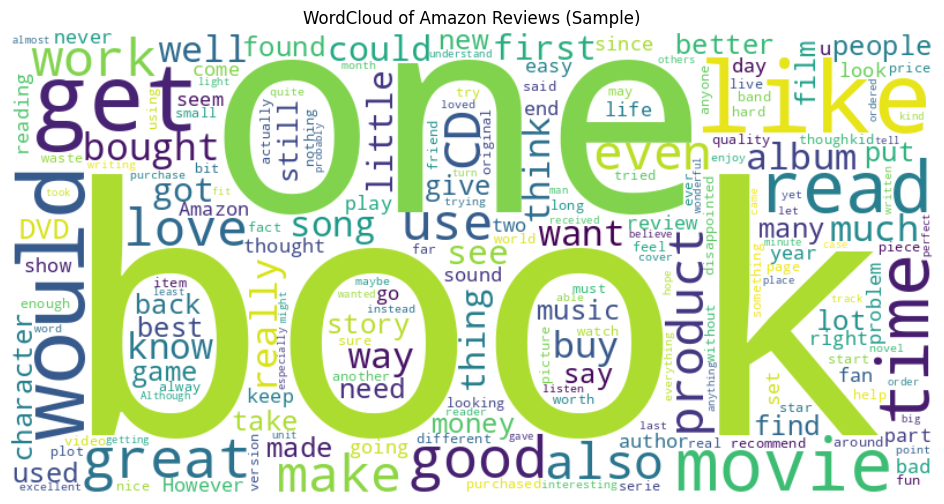

In [15]:
# a portion of the training text to avoid memory issues
sample_size = 50000
train_sample = train.sample(sample_size, random_state=42) if len(train) > sample_size else train

all_text = " ".join(review for review in train_sample['text'])

stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Amazon Reviews (Sample)")
plt.show()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=20000)

# Vectorise the train text
X_train = tfidf_vectorizer.fit_transform(train['text'])
y_train = train['sentiment']

# Vectorise the test text
X_test = tfidf_vectorizer.transform(test['text'])
y_test = test['sentiment']

print("Train TF-IDF shape:", X_train.shape)
print("Test TF-IDF shape:", X_test.shape)